In [1]:
def process_csv(csv):
    # preprocess to get ratio
    bwr = csv.loc[:, ' 戰功本週']/(csv.loc[:, ' 勢力值']+1)
    bwa = csv.loc[:, ' 戰功總量']/(csv.loc[:, ' 勢力值']+1)
    awr = csv.loc[:, ' 助攻本週']/(csv.loc[:, ' 勢力值']+1)
    awa = csv.loc[:, ' 助攻總量']/(csv.loc[:, ' 勢力值']+1)
    prepros = pd.DataFrame(list(zip(bwr, bwa, awr, awa)), columns=['周戰功比', '總戰功比', '周助功比', '總助功比'])
    zbwr = (bwr-bwr.mean())/(bwr.std()+1e-10)
    zbwa = (bwa-bwa.mean())/(bwa.std()+1e-10)
    zawr = (awr-awr.mean())/(awr.std()+1e-10)
    zawa = (awa-awa.mean())/(awa.std()+1e-10)
    prepros_z = pd.DataFrame(list(zip(zbwr, zbwa, zawr, zawa)), columns=['z周戰功比', 'z總戰功比', 'z周助功比', 'z總助功比'])
    return pd.concat([prepros, prepros_z], axis=1)

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

plt.style.use('_mpl-gallery')

def histogram(data, bins, title, fig, ax):
    mu, std = norm.fit(data) 
    ax.hist(data, bins=bins, linewidth=0.5, edgecolor="white")
    
    # Plot the PDF.
    xmin, xmax = ax.set_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2)
    plt.title(title)
    plt.show()

In [2]:
import pandas as pd
csv = pd.read_csv('默_官渡之戰.csv')
# csv = pd.read_csv('example.csv')
csv.keys()
file = pd.concat([csv, process_csv(csv)], axis=1)
file.keys()

Index(['成員', ' 貢獻排行', ' 貢獻本週', ' 戰功本週', ' 助攻本週', ' 捐獻本週', ' 貢獻總量', ' 戰功總量',
       ' 助攻總量', ' 捐獻總量', ' 勢力值', ' 所屬勢力', ' 分組', '周戰功比', '總戰功比', '周助功比',
       '總助功比', 'z周戰功比', 'z總戰功比', 'z周助功比', 'z總助功比'],
      dtype='object')

In [3]:
# csv = pd.read_csv('默_官渡之戰.csv')
csv2 = pd.read_csv('example.csv')
file2 = pd.concat([csv2, process_csv(csv2)], axis=1)
file2.keys()

Index(['成員', ' 貢獻排行', ' 貢獻本週', ' 戰功本週', ' 助攻本週', ' 捐獻本週', ' 貢獻總量', ' 戰功總量',
       ' 助攻總量', ' 捐獻總量', ' 勢力值', ' 所屬勢力', ' 分組', '周戰功比', '總戰功比', '周助功比',
       '總助功比', 'z周戰功比', 'z總戰功比', 'z周助功比', 'z總助功比'],
      dtype='object')

In [90]:
file2.loc[np.where((file2[' 戰功總量'] > 1000000) & (file2[' 勢力值'] < 15000))]

,成員,貢獻排行,貢獻本週,戰功本週,助攻本週,捐獻本週,貢獻總量,戰功總量,助攻總量,捐獻總量,...,所屬勢力,分組,周戰功比,總戰功比,周助功比,總助功比,z周戰功比,z總戰功比,z周助功比,z總助功比
80,伊米濃,66,1266753,25030,0,0,104434885,1470678,8426,831730,...,河南,資州一,2.091585,122.89446,0.0,0.704103,3.04433,2.986736,-0.290407,-0.89128


# 統計

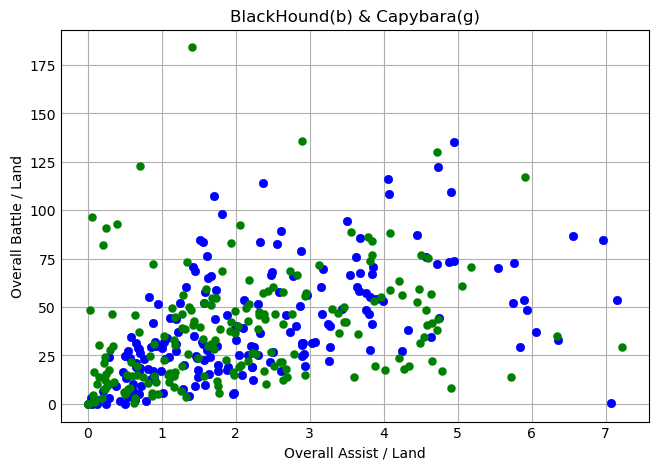

In [125]:
#  '成員', ' 貢獻排行', ' 貢獻本週', ' 戰功本週', ' 助攻本週', ' 捐獻本週', ' 貢獻總量', ' 戰功總量',
#        ' 助攻總量', ' 捐獻總量', ' 勢力值', ' 所屬勢力', ' 分組', '周戰功比', '總戰功比', '周助功比',
#        '總助功比', 'z周戰功比', 'z總戰功比', 'z周助功比', 'z總助功比'
import matplotlib.font_manager as fm
import matplotlib
import numpy as np
# my_font = fm.FontProperties(fname="C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXSizTwoSymReg.ttf")
# matplotlib.rcParams['font.family'] = ['Tw Cen MT']
# plt.rcParams['axes.unicode_minus']=False
# matplotlib.rcParams['font.family'=='Heiti TC']
def text_trans(key):
    if key == "成員":
        return "Member"
    elif key == ' 貢獻排行':
        return "Rank"
    elif key == ' 勢力值':
        return 'Land'
    elif key ==  ' 戰功總量':
        return "Battle"
    elif key ==  'z總戰功比':
        return "Overall Battle / Land (zscore)"
    elif key ==  'z周戰功比':
        return "Weekly Battle / Land (zscore)"
    elif key ==  '總戰功比':
        return "Overall Battle / Land"
    elif key ==  '總助功比':
        return "Overall Assist / Land"
    else:
        return "tbd"

def scatter_plot(data, keyx, keyy, title, fig, ax, color='b', compare=None, name=None, bpoly=False):
    x = data.loc[:,keyx]
    y = data.loc[:,keyy]
    ax.scatter(x, y, color=color, linewidth=0.5)
    
    if compare != None:
        data2, tit2, color2 = compare
        x2, y2=data2.loc[:,keyx], data2.loc[:,keyy]
        ax.scatter(x2, y2, color=color2, linewidth=0.1)
        x=pd.concat([x, x2])
        y=pd.concat([y, y2])
        plt.title(title+"(b) & "+tit2+"(g)")
    else:
        plt.title(title)
        
    if name != None:
        sp_x=(data.loc[np.where(data['成員']==name)][keyx])
        sp_y=(data.loc[np.where(data['成員']==name)][keyy])
        if len(sp_x) == 0:
            sp_x=(data2.loc[np.where(data2['成員']==name)][keyx])
            sp_y=(data2.loc[np.where(data2['成員']==name)][keyy])
            print(sp_x, sp_y)
        ax.scatter(sp_x, sp_y, color='purple', marker='d',linewidth=5)
#         ax.annotate(name, (sp_x, sp_y))
        
#     plt.show()
    if bpoly == True:
        poly = np.poly1d(np.polyfit(x,y,2))
        ax.plot(np.sort(x), np.sort(poly(x)), 'red')
    ax.set_xlabel(text_trans(keyx))
    ax.set_ylabel(text_trans(keyy))
    

fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
# scatter_plot(file,' 勢力值', ' 戰功總量', "BlackHound", fig, ax, compare=(file2, "Capybara", 'g'), name='伊米濃', poly=True)
scatter_plot(file,'總助功比', '總戰功比', "BlackHound", fig, ax, compare=(file2, "Capybara", 'g'))
# scatter_plot(file,'總助功比', '總戰功比', "BlackHound", fig, ax, compare=(file2, "Capybara", 'g'))

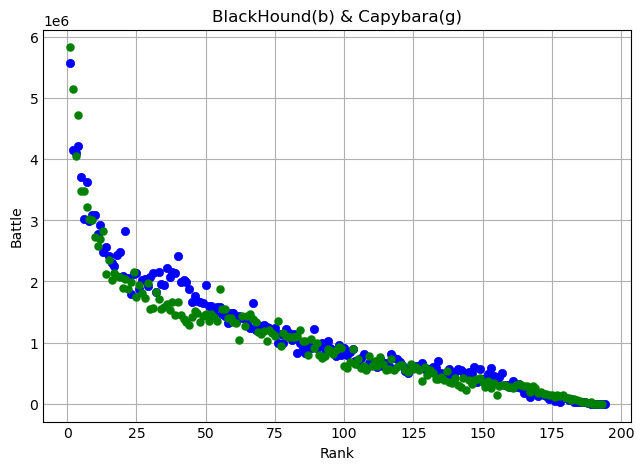

In [65]:
#  '成員', ' 貢獻排行', ' 貢獻本週', ' 戰功本週', ' 助攻本週', ' 捐獻本週', ' 貢獻總量', ' 戰功總量',
#        ' 助攻總量', ' 捐獻總量', ' 勢力值', ' 所屬勢力', ' 分組', '周戰功比', '總戰功比', '周助功比',
#        '總助功比', 'z周戰功比', 'z總戰功比', 'z周助功比', 'z總助功比'
import matplotlib.font_manager as fm
import matplotlib
import numpy as np
# my_font = fm.FontProperties(fname="C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXSizTwoSymReg.ttf")
# matplotlib.rcParams['font.family'] = ['Tw Cen MT']
# plt.rcParams['axes.unicode_minus']=False
# matplotlib.rcParams['font.family'=='Heiti TC']
def text_trans(key):
    if key == "成員":
        return "Member"
    elif key == ' 貢獻排行':
        return "Rank"
    elif key == ' 勢力值':
        return 'Land'
    elif key ==  ' 戰功總量':
        return "Battle"
    elif key ==' 助攻總量':
        return "Assist"
    else:
        return "tbd"

def scatter_plot(data, keyx, keyy, title, fig, ax, color='b', compare=None, ploy=True):
    x = data.loc[:,keyx]
    y = data.loc[:,keyy]
    ax.scatter(x, y, color=color, linewidth=0.5)
        
    if compare != None:
        data2, tit2, color2 = compare
        x2, y2 = data2.loc[:,keyx], data2.loc[:,keyy]
        ax.scatter(x2, y2, color=color2, linewidth=0.1)
        x=pd.concat([x, x2])
        y=pd.concat([y, y2])
        plt.title(title+"(b) & "+tit2+"(g)")
    else:
        plt.title(title)
    
    x=np.sort(x)
#     plt.show()

    if ploy == True:
        poly = np.poly1d(np.polyfit(x,y,2))
        ax.plot(x, poly(x), 'red')
    ax.set_xlabel(text_trans(keyx))
    ax.set_ylabel(text_trans(keyy))

fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
scatter_plot(file,' 貢獻排行', ' 戰功總量', "BlackHound", fig, ax, compare=(file2, "Capybara", 'g'), ploy=False)

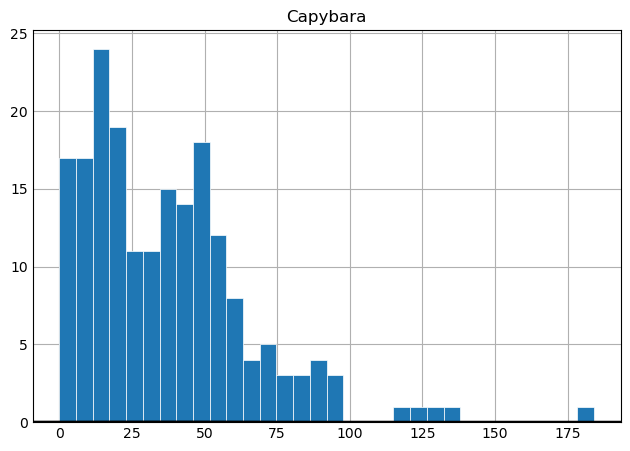

In [8]:
# 總戰功
histogram(file2.loc[:,'總戰功比'], 32, "Capybara", fig, ax)

In [7]:
class member:
    def __init__(self, data, by_land=True):
        self.name, self.rank, self.contri_week, self.battle_week, self.assist_week, self.donate_week, \
            self.contri_all, self.battle_all, self.assist_all, self.donate_all, self.land, self.loc, self.group,\
            self.b_w_land, self.b_a_land, self.a_w_land, self.a_a_land,\
            self.b_w_z, self.b_a_z, self.a_w_z, self.a_a_z=  data
        if by_land == False:
            land = 1
        else:
            land = self.land
       
        self.d_a_land = self.donate_all/land
    
#     def z_score(self, value, mean, std):
#         return (value-mean)/std
    
#     def preprocess(self, b_w, b_a, a_w, a_a):
#         self.b_w_z = self.z_score(self.b_w_land, b_w.mean(), b_w.std())
#         self.b_a_z = self.z_score(self.b_a_land, b_a.mean(), b_a.std())
#         self.a_w_z = self.z_score(self.a_w_land, a_w.mean(), a_w.std())
#         self.a_a_z = self.z_score(self.a_a_land, b_a.mean(), b_a.std())

In [8]:
members = []
for i in range(len(file)):
    new_member = member(file.values.tolist()[i])
#     new_member.preprocess(file.loc[:, '周戰功比'], file.loc[:, '總戰功比'],
#                           file.loc[:, '周助功比'], file.loc[:, '周助功比'])
    members.append(new_member)